In [1]:
# import all necessary packages
import pandas as pd
import numpy as np


# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# load data to a new dataframe
df = pd.read_csv("data_fixed.csv")

In [3]:
# describe the dataframe with some statistical info
df.describe()

,average wpm,second_1,second_2,second_3,second_4,average_second
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,48.526316,631.421053,562.421053,532.052632,592.684211,579.644737
std,11.505402,293.730473,216.299770,217.997317,210.591509,211.457431
min,28.000000,241.000000,247.000000,246.000000,258.000000,279.000000
25%,44.000000,422.000000,343.000000,379.500000,437.000000,392.875000
50%,47.333333,612.000000,636.000000,466.000000,584.000000,583.000000
75%,53.166667,732.500000,702.500000,674.500000,721.000000,692.625000
max,75.000000,1462.000000,981.000000,1088.000000,1030.000000,1034.750000


In [13]:
#convert data types average accuracy
df['average accuracy'] = df['average accuracy'].str.replace('%', '').astype(float)

In [14]:
# new x will be X1 and X2
x = df[['average wpm', 'average accuracy']]
y = df[['average_second']]
x

,average wpm,average accuracy
0,52.333333,94.0
1,38.666667,81.0
2,28.000000,100.0
3,55.333333,96.0
4,47.333333,100.0
5,54.000000,100.0
6,59.666667,98.0
7,44.000000,100.0
8,46.000000,94.0
9,45.666667,100.0


In [15]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [16]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (15, 2)
X_test: (4, 2)
Y_train: (15, 1)
Y_test: (4, 1)


In [17]:
# create a linear regression model
model = LinearRegression()

In [18]:
# train the model using training data
model.fit(x_train, y_train)  

LinearRegression()

In [19]:
# print coefficients
model.coef_

array([[ -8.79740896, -46.7451262 ]])

In [20]:
# print y_intercept | bias
model.intercept_

array([5624.46010167])

In [21]:
# make predictions using test data
y_pred = model.predict(x_test)

In [23]:
# let's calculate the metrics
mse_2 = mean_squared_error(y_test, y_pred)
import math
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

Text(0, 0.5, 'Predicted')

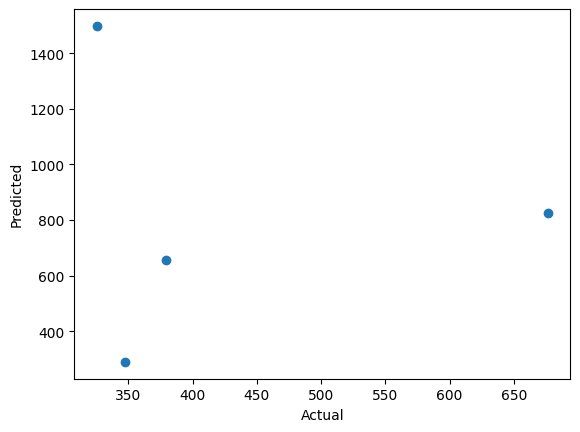

In [24]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='average_second'>

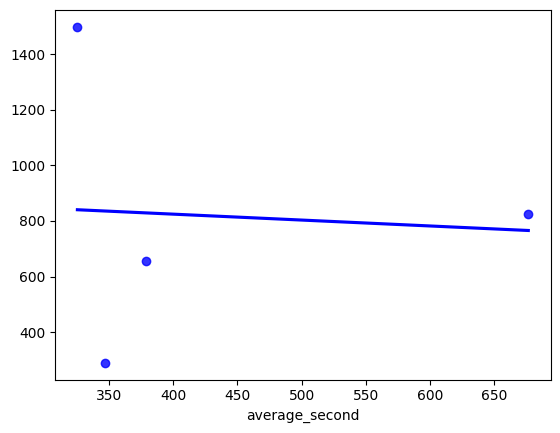

In [25]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

In [26]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First'],
    'MSE' : [mse_2],
    'RMSE' : [rmse_2],
    'MAE' : [mae_2],
    'R2' : [r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,369315.63295,607.713446,414.121133,-17.212167
